In [1]:
from BeeWorldGame.bee_world.run_game import BeeWorldGame
import argparse    

In [22]:
import sys; sys.argv=['']; del sys
def argpars_compose(params):
    parser = argparse.ArgumentParser(
        description='Arguments for the BeeWorld game'
        )

    # Agent arguments
    parser.add_argument('--step_interval', type=float, default=0.1, 
                        help='The interval of the agent moves in the '
                        'environment')
    parser.add_argument('--initial_location', type=float, default=0.0, 
                        help='The relative starting position of the agent in '
                        'the environment')
    parser.add_argument('--random_state', default=2022, help='The random state'
                        ' value')
    parser.add_argument('--n_trials', type=int, default=100, help='The number '
                        'of simulated steps to evaluate')
    # Environment arguments
    parser.add_argument('--steps', type=int, default=2000, help='The time over'
                        ' which the environment evolves')
    parser.add_argument('--w', type=float, default=0.1, help='Speed at which'
                        ' the environment evolves over time')
    parser.add_argument('--circle_length', type=int, default=1, 
                        help='The length of a circle')
    parser.add_argument('--c', type=float, default=0.01, help='The grid of the'
                        ' game environment')
    # Game arguments
    parser.add_argument('--environment', type=str, default='BeeWorldEnv',
                        help='The name of the environment')
    parser.add_argument('--agent', type=str, default='BeeAgent', help='The '
                        'name of the agent')
    parser.add_argument('--function',type=str, default='ESN', help=' name of '
                        'the value function approximator')
    parser.add_argument('--n', type=int, default=2000, help='The number of '
                        'time steps in the game')
    # function approximator arguments
    parser.add_argument('--n_inputs', default=2, help='The dimensionality of '
                        'the input')
    parser.add_argument('--n_outputs', default=1, help='The dimensionality of '
                        'the output')
    parser.add_argument('--n_reservoir', default=params['n_reservoir'], help='The size of the '
                        'reservoir')
    parser.add_argument('--activation', default=params['activation'], help='The activation '
                        'function')
    parser.add_argument('--two_norm', type=float, default=params['two_norm'], help='The 2-norm '
                        'of the recurrent weight matrix')
    parser.add_argument('--sparsity', type=float, default=params['sparsity'], 
                        help='The proportion of recurrent weights set to zero')
    parser.add_argument('--L2', type=float, default=params['L2'], 
                        help='The regularisation parameter of the ridge '
                        'regression')
    parser.add_argument('--gamma', type=float, default=params['gamma'], help='The discount'
                        ' factor of the value function')
    parser.add_argument('--sampling_bounds', type=float, default=1, 
                        help='The uniform bounds of the interval from which to'
                        ' sample the random matrices') 

    parser.add_argument('--rho', type=float, default=params['rho'], help='The scaling '
                        'factor for the input weights matrix')

    parser.add_argument('--xi', type=float, default=params['xi'], help='The scaling '
                        'factor for the states weights matrix')

    parser.add_argument('--estimator', default=params['estimator'])
    config = parser.parse_args()
    return config

from sklearn.model_selection import ParameterGrid
param_grid = {
    'estimator': ['ridge', 'liu'],
    'L2':[10],
    'gamma': [0.1,0.25,0.35,0.45,0.5,0.65,0.75,0.85,0.9], 
    'n_reservoir': [100,200,300],  
    'sparsity': [0.0,0.1,0.25,0.4,0.5,0.7,0.8,0.9], 
    'two_norm': [0.9], 
    'activation': ['Tanh'],
    'rho': [0.99],
    'xi': [0.5]
}

grid = ParameterGrid(param_grid)

k =  len([i for i in grid])
results = {}
vifs = []
scores = []
sparsity = []
for i, params in enumerate(grid):
    print(f'{i+1}/{k}')
    config = argpars_compose(params)
    BeeGame = BeeWorldGame(config)
    BeeGame.run_game(mode='init')
    BeeGame.run_game(mode='train')
    score = BeeGame.z[:,0].mean()
    print(f'{params}|| score: {score}')
    results[str(params)] = score
    vifs.append(BeeGame.function.VIF)
    sparsity.append(BeeGame.function.sparsity)
    scores.append(score)
best_score = max([i for i in results.values()])
best_res = [n for n, v in results.items() if v == best_score]
print(f'Best score: {best_score} for params: {best_res}')

1/432
{'L2': 10, 'activation': 'Tanh', 'estimator': 'ridge', 'gamma': 0.1, 'n_reservoir': 100, 'rho': 0.99, 'sparsity': 0.0, 'two_norm': 0.9, 'xi': 0.5}|| score: 1.186056784104481
2/432
{'L2': 10, 'activation': 'Tanh', 'estimator': 'ridge', 'gamma': 0.1, 'n_reservoir': 100, 'rho': 0.99, 'sparsity': 0.1, 'two_norm': 0.9, 'xi': 0.5}|| score: 1.327227892672328
3/432
{'L2': 10, 'activation': 'Tanh', 'estimator': 'ridge', 'gamma': 0.1, 'n_reservoir': 100, 'rho': 0.99, 'sparsity': 0.25, 'two_norm': 0.9, 'xi': 0.5}|| score: 1.3301937752557464
4/432
{'L2': 10, 'activation': 'Tanh', 'estimator': 'ridge', 'gamma': 0.1, 'n_reservoir': 100, 'rho': 0.99, 'sparsity': 0.4, 'two_norm': 0.9, 'xi': 0.5}|| score: 1.2314479038837152
5/432
{'L2': 10, 'activation': 'Tanh', 'estimator': 'ridge', 'gamma': 0.1, 'n_reservoir': 100, 'rho': 0.99, 'sparsity': 0.5, 'two_norm': 0.9, 'xi': 0.5}|| score: 1.0807784621935792
6/432
{'L2': 10, 'activation': 'Tanh', 'estimator': 'ridge', 'gamma': 0.1, 'n_reservoir': 100, '

In [23]:
config = argpars_compose(eval(best_res[0]))

In [24]:
# initialising the game
BeeGame = BeeWorldGame(config)

In [25]:
# run the game with the uniform policy pi_0
BeeGame.run_game(mode='init')

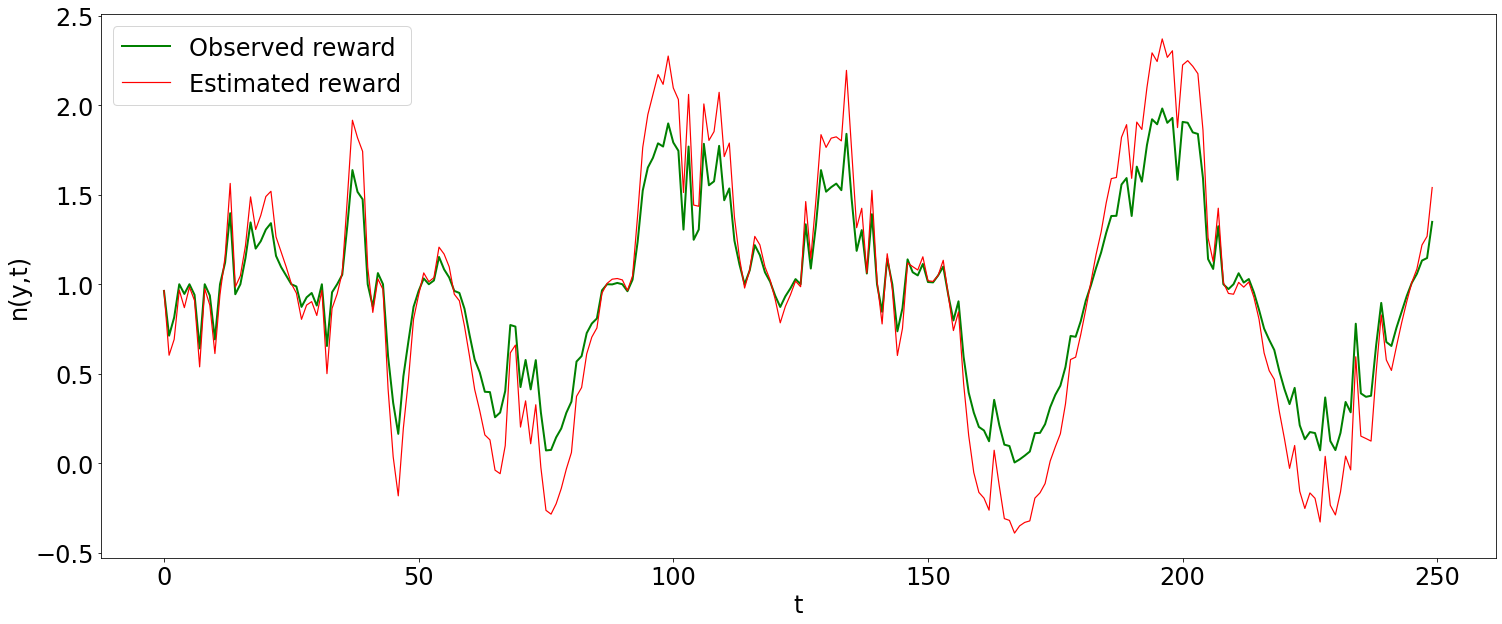

In [26]:
# plot true and estimated nectar function
BeeGame.plot_rewards()

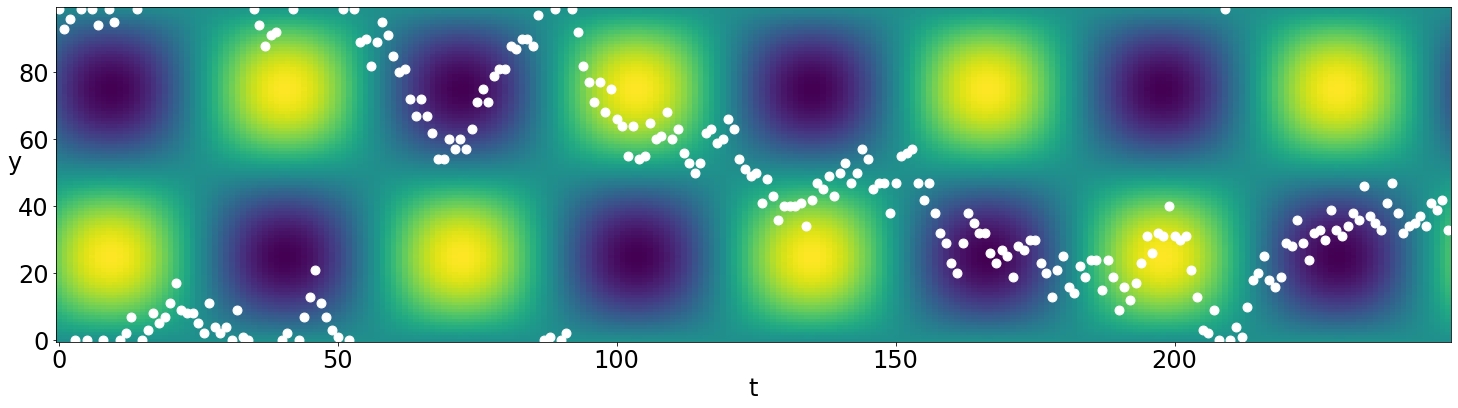

In [27]:
# plot the Bee trajectory
BeeGame.plot_game()

In [28]:
print(f'Average nectar unit collected by the Bee \n'
      f'per time unit under the strategy pi_0: {BeeGame.z[:,0].mean()}')

Average nectar unit collected by the Bee 
per time unit under the strategy pi_0: 1.00252271317065


In [29]:
# estimate the imporoved policy pi_1 and run the game
BeeGame.run_game(mode='train')

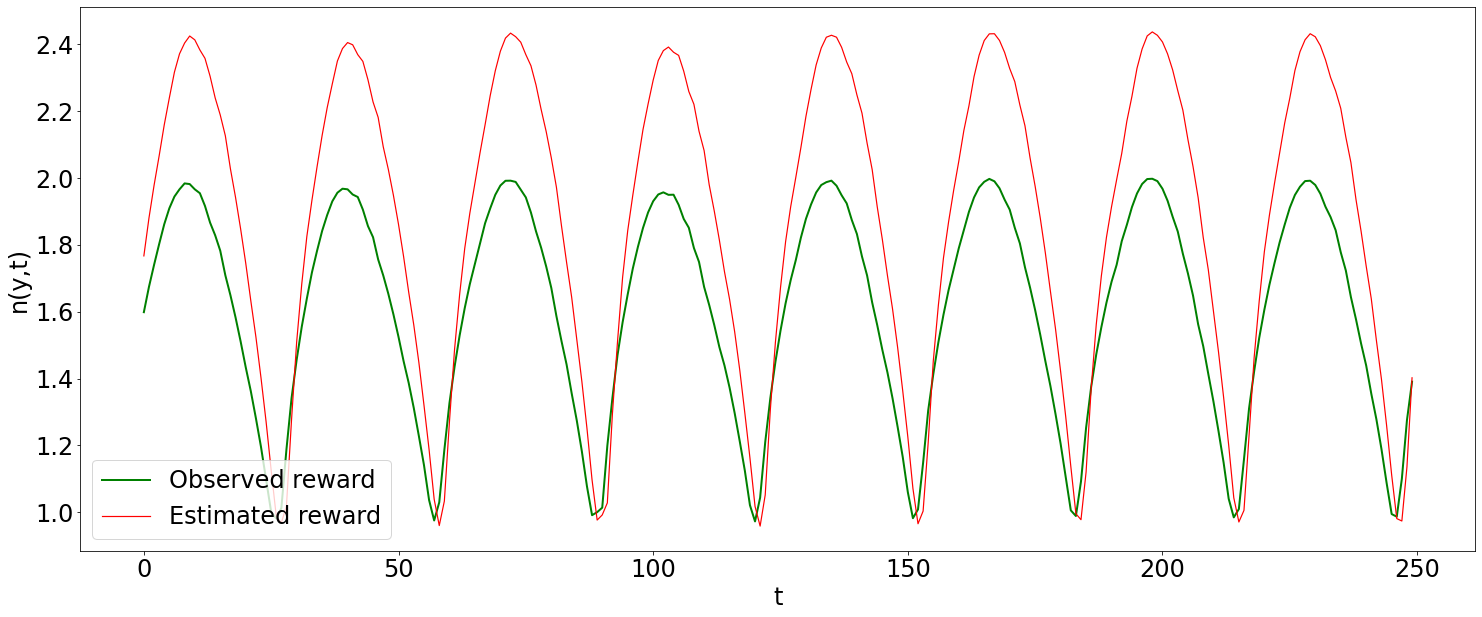

In [30]:
# plot true and estimated nectar function
BeeGame.plot_rewards()

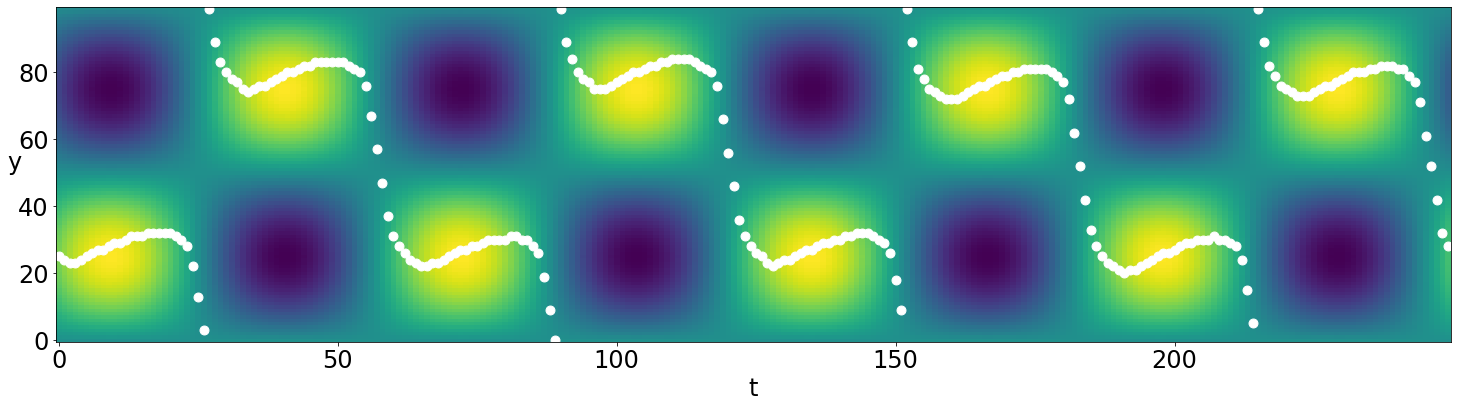

In [31]:
# plot the Bee trajectory
BeeGame.plot_game()

In [32]:
print(f'Average nectar unit collected by the Bee \n'
      f'per time unit under the improved strategy pi_1: {BeeGame.z[:,0].mean()}')

Average nectar unit collected by the Bee 
per time unit under the improved strategy pi_1: 1.6012705945144667


In [33]:
#  We now consider an analytic solution for the Bee World game
BeeGame.run_game(mode='solution')

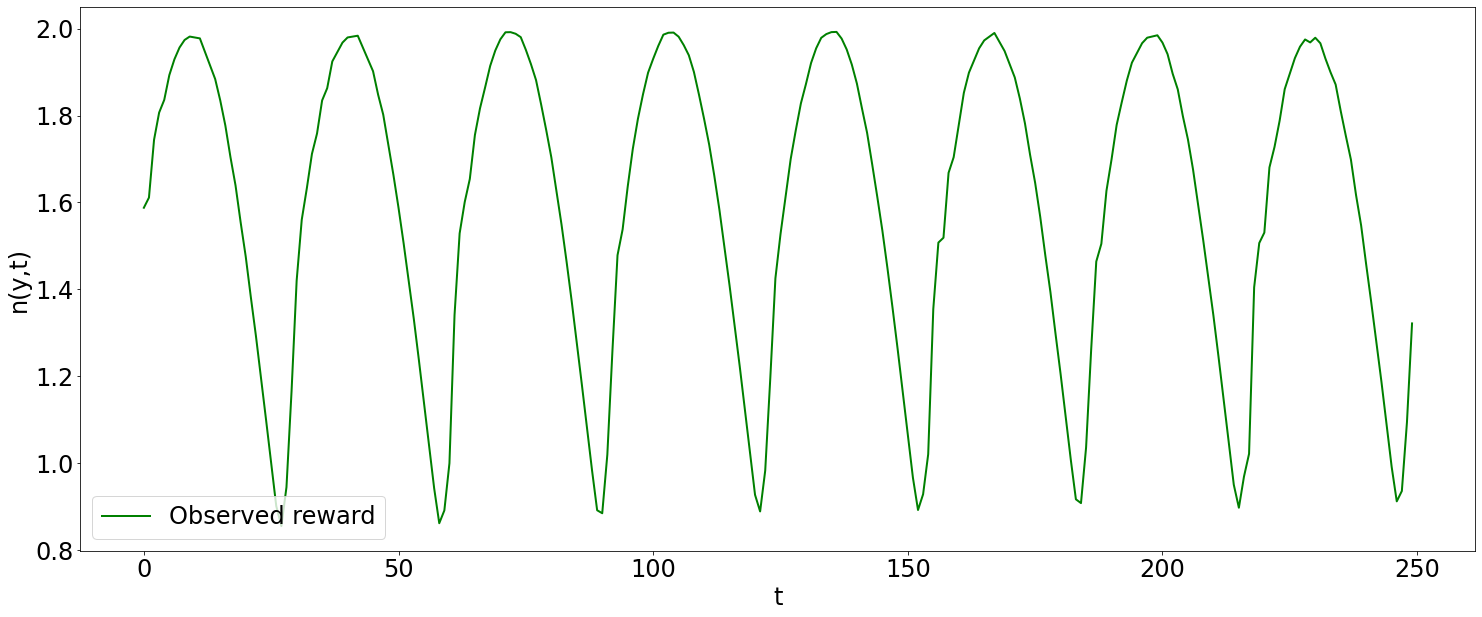

In [34]:
# Plot the collected amount of nectar
BeeGame.plot_rewards(solution=True)

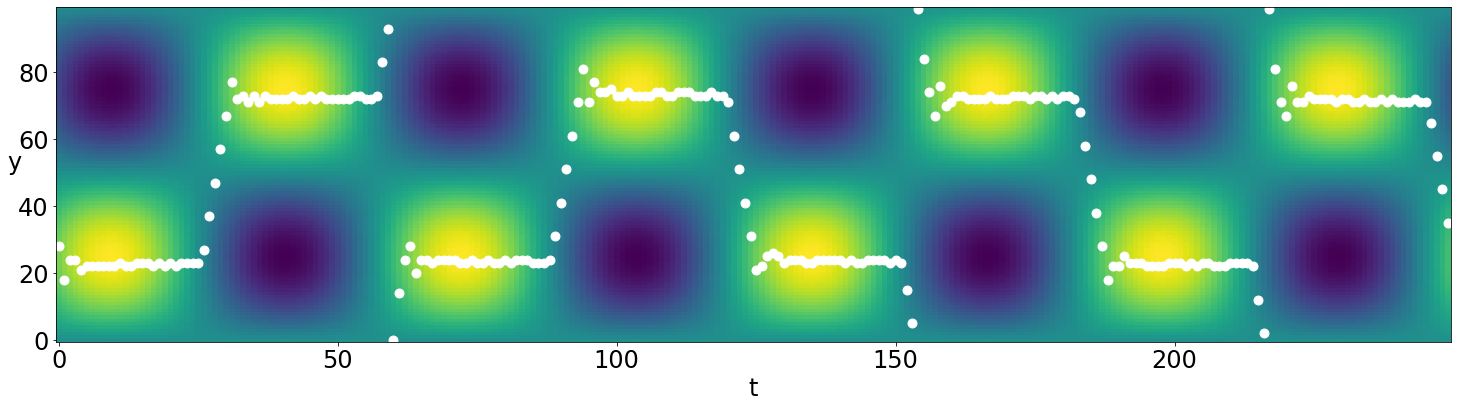

In [35]:
# plot the trajectory of the Bee obtained using the analytic solution
BeeGame.plot_game()

In [36]:
print(f'Average nectar unit collected by the Bee \n'
      f'per time unit using the numerical solution to the \n'
      f'dynamical system ODEs: {BeeGame.z[:,0].mean()}')

Average nectar unit collected by the Bee 
per time unit using the numerical solution to the 
dynamical system ODEs: 1.5952705162437641


----